# Regresión Lineal Multiple

## Paso 1: Importar librerías

In [1]:
##Warnings
import warnings
warnings.filterwarnings('ignore')

##test de normalidad
from scipy import stats

##Librerías
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

##Normalización
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

##Función para el modelo 
import statsmodels.api as sm

## Paso 2: Funciones


In [2]:
# Función para importar data .xlsx o .csv
def importDatos(ruta, archivo, ext, sep):
    if ext == '.csv':
        data = pd.read_csv(ruta+archivo+ext, sep)
        return data
    elif ext == '.xlsx':
        data = pd.read_excel(ruta+archivo+ext)
        return data
    else:
        print('Extensión diferente')
        
def diagCaja(df, coluno, coldos, coltres):
    fig, ax = plt.subplots(3, figsize=(5,5))
    plt1 = sns.boxplot(df[coluno], ax=ax[0])
    plt2 = sns.boxplot(df[coldos], ax=ax[1])
    plt3 = sns.boxplot(df[coltres], ax=ax[2])
    plt.tight_layout()

##Función para cruce de variables
def grafT(df, vect, vary):
    sns.pairplot(df, x_vars=vect, y_vars=vary, height=4, aspect=1, kind='reg')

# Función para el test de Shapiro - wilk - resistente al ruido en los datos

def testShapiroWilk(df):
    valoresP = []
    concepto = []
    variable = []
    for column in df:
        k2, p_value = stats.shapiro(df[column].values)
        valoresP.append(p_value)
        variable.append(column)
        if (p_value < 0.05):
            concepto.append('No es una variable Normal')
        else:
            concepto.append('Es una variable Normal')
    dfShapiro = pd.DataFrame(
        {'Variable': variable, 'Valores P': valoresP, 'Concepto': concepto})
    return dfShapiro

# Función para normalizar la data min - max sklearn


def normaData(df):
    valores = df.values  
    scaler = MinMaxScaler(feature_range=(0, 1))
    scaler = scaler.fit(valores)

    pd.DataFrame(np.vstack((scaler.data_min_, scaler.data_max_)),
             index=['Min', 'Max'],
             columns=df.columns)

    normalizados = scaler.transform(valores)
    df_norm = pd.DataFrame(normalizados,
                       index=df.index,
                       columns=df.columns)
    return df_norm

## Función para hacer la matriz de correlación de manera Tidy
def tidy_corr_matrix(corr_mat):
    '''
    Función para convertir una matriz de correlación de pandas en formato tidy.
    '''
    corr_mat = corr_mat.stack().reset_index()
    corr_mat.columns = ['variable_1','variable_2','r']
    corr_mat = corr_mat.loc[corr_mat['variable_1'] != corr_mat['variable_2'], :]
    corr_mat['abs_r'] = np.abs(corr_mat['r'])
    corr_mat = corr_mat.sort_values('abs_r', ascending=False)
    
    return(corr_mat)

##MultiGraficas
def multigraf(df, coluno, coldos):
    g = sns.FacetGrid(df, col=coluno)
    g.map(sns.histplot, coldos)
    return g

def multigrafDos(df, coluno, coldos, coltres):
  h = sns.FacetGrid(df, col=coluno, height=4, aspect=.5)
  h.map(sns.barplot, coldos, coltres, order=['M','F'])
  return h

def barrasM(df, colx, coly, cruce):
  sns.catplot(x=colx, y=coly, hue=cruce, kind='bar', data=df)

def disper(df, cruce, num, numdos):
  g = sns.FacetGrid(df, hue=cruce, palette='flare', height=5)
  g.map(sns.scatterplot, num,numdos, s=100, alpha=.5)
  g.add_legend()
  return g

def multigrafT(df, var1, var2, var3, var4, var5):
  sns.pairplot(df, x_vars=[var1, var2, var3, var4], y_vars=var5, height=6, aspect=1, kind='scatter')

def corr(df):
  f, ax = plt.subplots(figsize=(18,10))
  sns.heatmap(df.corr(), annot=True, linewidths=.5, ax=ax)

    

## Paso 3: Importar Data

In [3]:
data = importDatos('../Datasets/','student-mat','.csv',';')
data.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


In [4]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
age,395.0,16.696203,1.276043,15.0,16.0,17.0,18.0,22.0
Medu,395.0,2.749367,1.094735,0.0,2.0,3.0,4.0,4.0
Fedu,395.0,2.521519,1.088201,0.0,2.0,2.0,3.0,4.0
traveltime,395.0,1.448101,0.697505,1.0,1.0,1.0,2.0,4.0
studytime,395.0,2.035443,0.839240,1.0,1.0,2.0,2.0,4.0
failures,395.0,0.334177,0.743651,0.0,0.0,0.0,0.0,3.0
famrel,395.0,3.944304,0.896659,1.0,4.0,4.0,5.0,5.0
freetime,395.0,3.235443,0.998862,1.0,3.0,3.0,4.0,5.0
goout,395.0,3.108861,1.113278,1.0,2.0,3.0,4.0,5.0
Dalc,395.0,1.481013,0.890741,1.0,1.0,1.0,2.0,5.0


## Paso 3: Multigráficas 

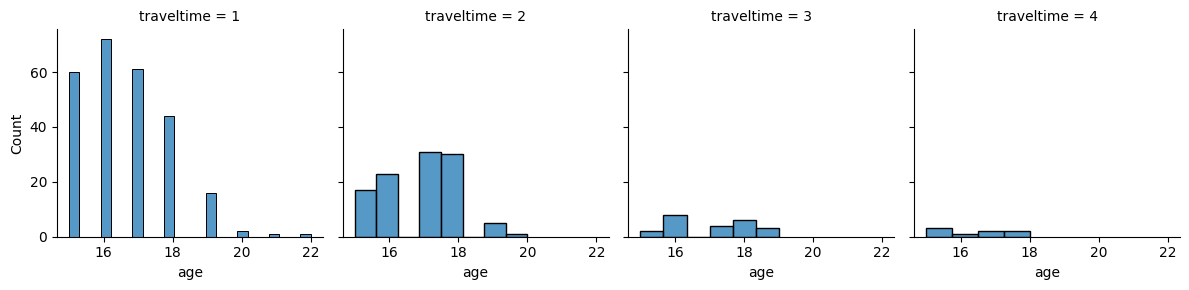

In [5]:
multigraf(data, 'traveltime','age')

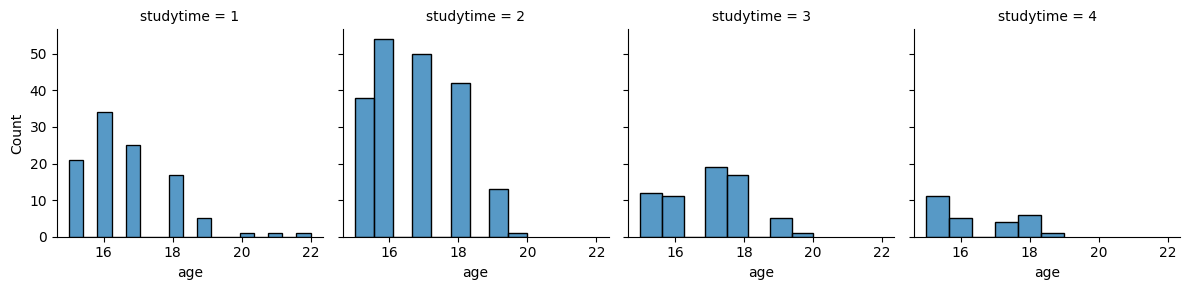

In [6]:
multigraf(data, 'studytime','age')

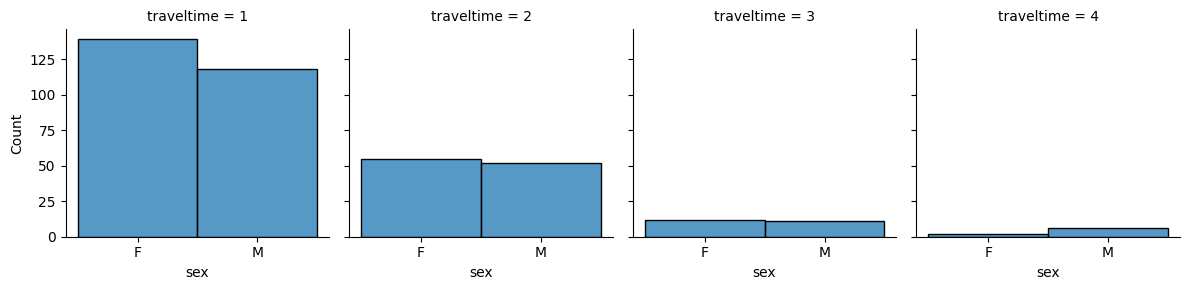

In [7]:
multigraf(data, 'traveltime','sex')

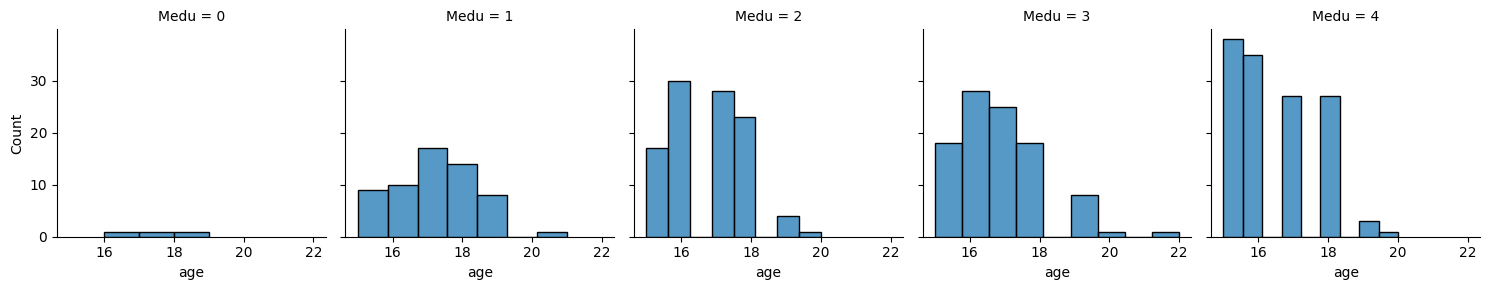

In [8]:
multigraf(data, 'Medu','age')

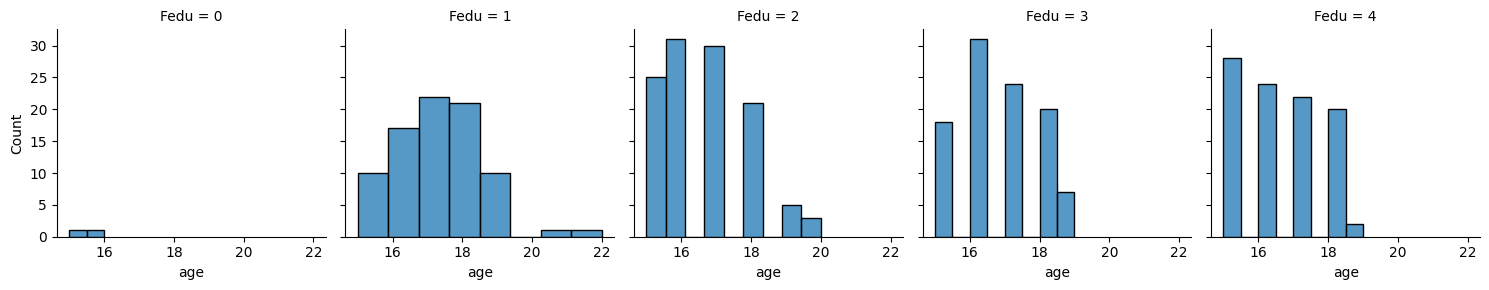

In [9]:
multigraf(data, 'Fedu','age')

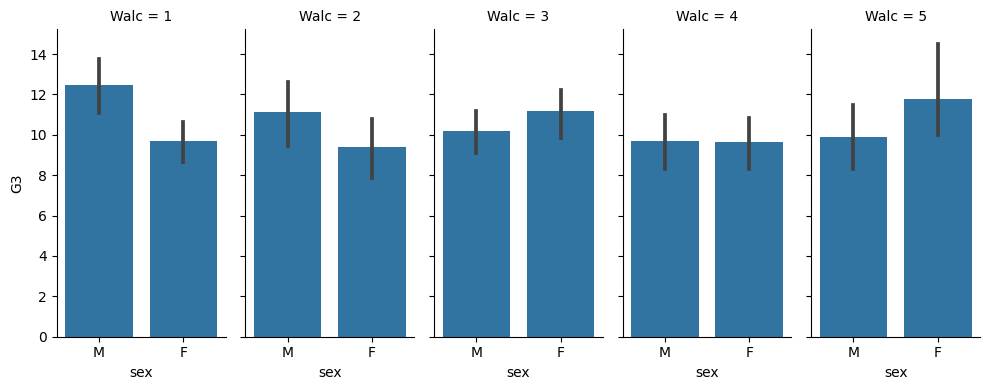

In [10]:
multigrafDos(data, 'Walc', 'sex','G3')

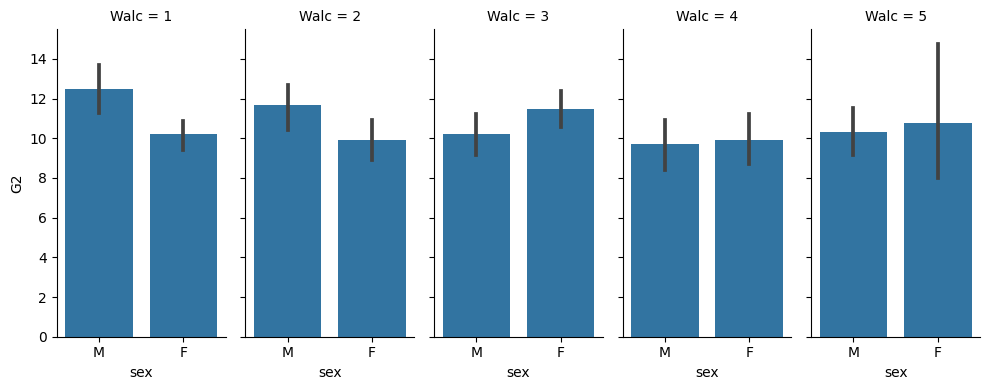

In [11]:
multigrafDos(data, 'Walc', 'sex','G2')

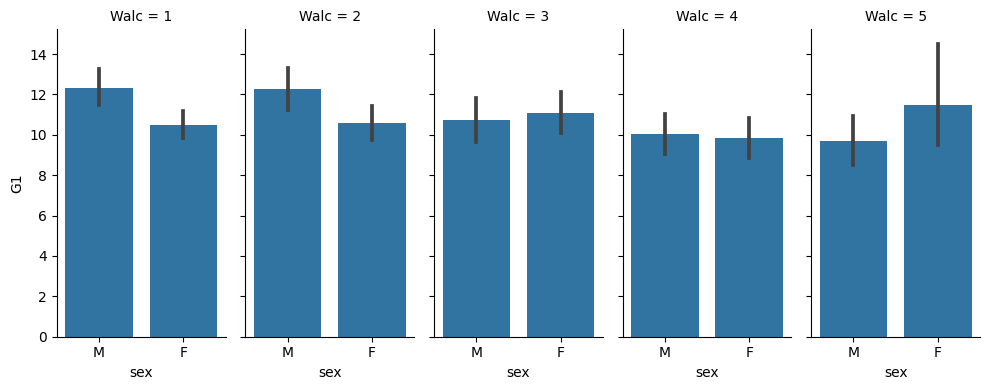

In [12]:
multigrafDos(data, 'Walc', 'sex','G1')

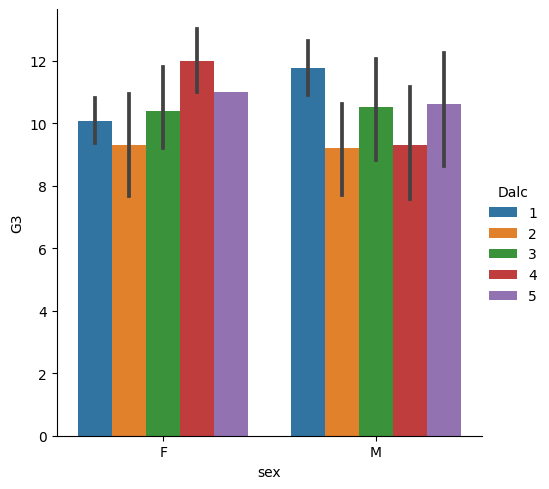

In [13]:
barrasM(data, 'sex','G3', 'Dalc')

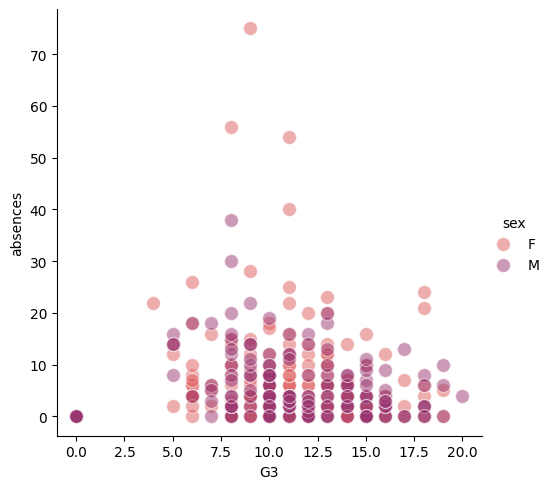

In [14]:
disper(data, 'sex', 'G3','absences')

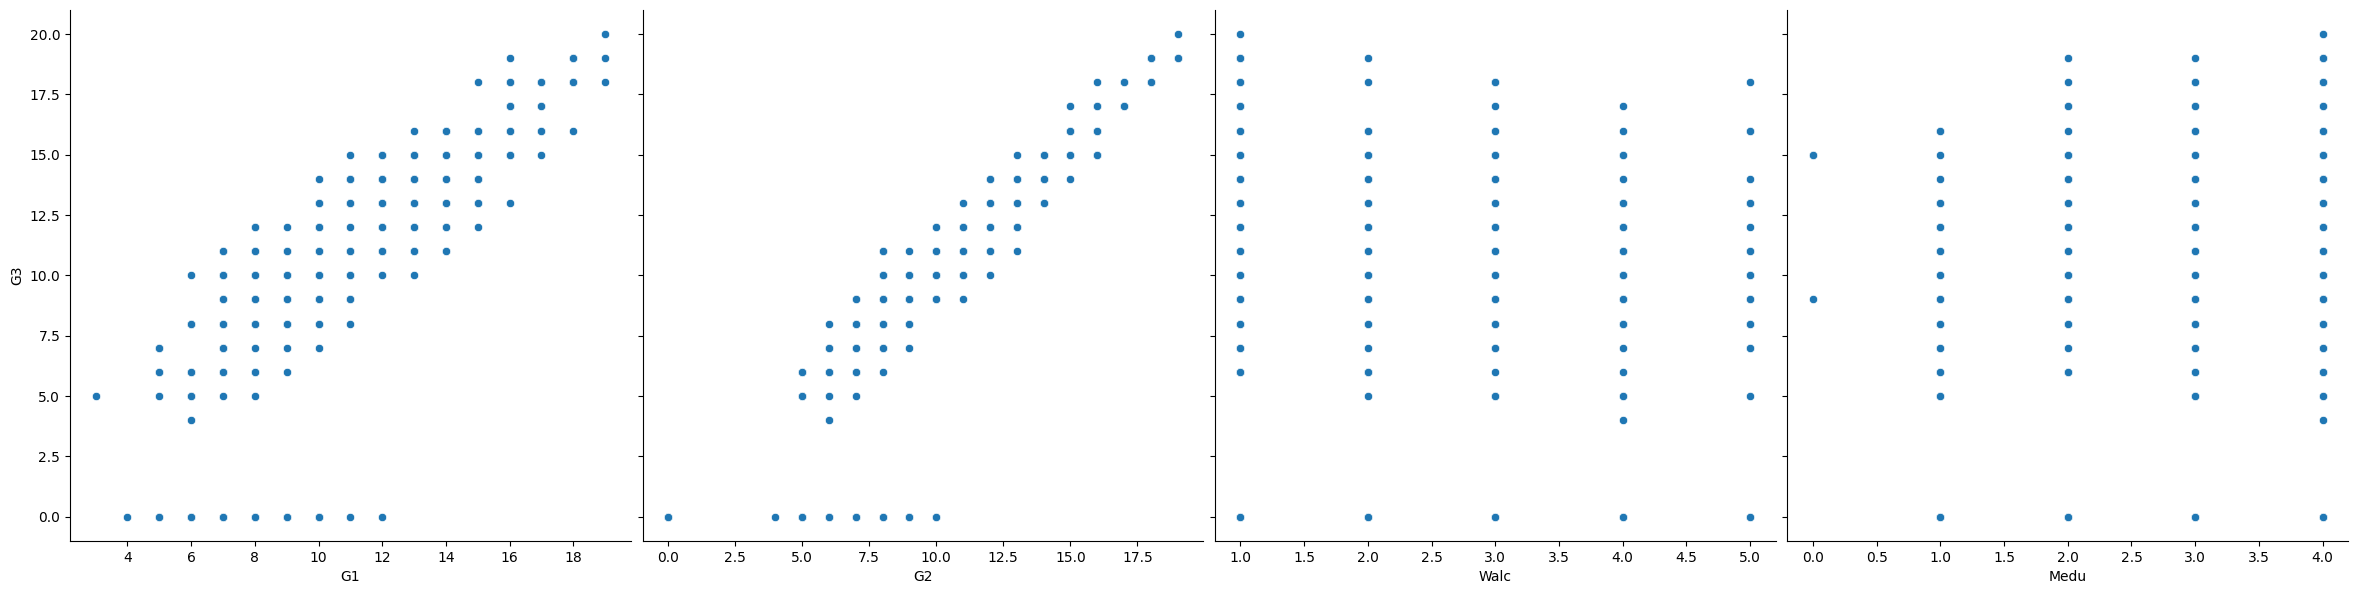

In [15]:
multigrafT(data, 'G1','G2','Walc','Medu','G3')

In [16]:
numerico = [i for i in data.columns if data[i].dtype!='O']
numerico

['age',
 'Medu',
 'Fedu',
 'traveltime',
 'studytime',
 'failures',
 'famrel',
 'freetime',
 'goout',
 'Dalc',
 'Walc',
 'health',
 'absences',
 'G1',
 'G2',
 'G3']

In [17]:
datos = data[numerico]
datos.head()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,18,4,4,2,2,0,4,3,4,1,1,3,6,5,6,6
1,17,1,1,1,2,0,5,3,3,1,1,3,4,5,5,6
2,15,1,1,1,2,3,4,3,2,2,3,3,10,7,8,10
3,15,4,2,1,3,0,3,2,2,1,1,5,2,15,14,15
4,16,3,3,1,2,0,4,3,2,1,2,5,4,6,10,10


In [18]:
##Normalización
dataNorm = normaData(datos)

dataNorm.describe().T

,count,mean,std,min,25%,50%,75%,max
age,395.0,0.242315,0.182292,0.0,0.142857,0.285714,0.428571,1.0
Medu,395.0,0.687342,0.273684,0.0,0.500000,0.750000,1.000000,1.0
Fedu,395.0,0.630380,0.272050,0.0,0.500000,0.500000,0.750000,1.0
traveltime,395.0,0.149367,0.232502,0.0,0.000000,0.000000,0.333333,1.0
studytime,395.0,0.345148,0.279747,0.0,0.000000,0.333333,0.333333,1.0
failures,395.0,0.111392,0.247884,0.0,0.000000,0.000000,0.000000,1.0
famrel,395.0,0.736076,0.224165,0.0,0.750000,0.750000,1.000000,1.0
freetime,395.0,0.558861,0.249716,0.0,0.500000,0.500000,0.750000,1.0
goout,395.0,0.527215,0.278320,0.0,0.250000,0.500000,0.750000,1.0
Dalc,395.0,0.120253,0.222685,0.0,0.000000,0.000000,0.250000,1.0


In [19]:
##Test shapiro - wilk
testShapiroWilk(dataNorm)

,Variable,Valores P,Concepto
0,age,1.587755e-14,No es una variable Normal
1,Medu,2.815527e-18,No es una variable Normal
2,Fedu,2.706835e-17,No es una variable Normal
3,traveltime,2.310144e-27,No es una variable Normal
4,studytime,6.547699e-20,No es una variable Normal
5,failures,1.138359e-31,No es una variable Normal
6,famrel,3.906261e-20,No es una variable Normal
7,freetime,6.425508e-15,No es una variable Normal
8,goout,1.412838e-14,No es una variable Normal
9,Dalc,2.968092e-29,No es una variable Normal


In [20]:
corr_matrix = dataNorm.corr(method='spearman')

tidy_corr_matrix(corr_matrix)

,variable_1,variable_2,r,abs_r
254,G3,G2,0.957125,0.957125
239,G2,G3,0.957125,0.957125
237,G2,G1,0.894792,0.894792
222,G1,G2,0.894792,0.894792
223,G1,G3,0.878001,0.878001
...,...,...,...,...
44,Fedu,absences,0.003568,0.003568
131,goout,traveltime,-0.001430,0.001430
56,traveltime,goout,-0.001430,0.001430
112,freetime,age,0.000302,0.000302


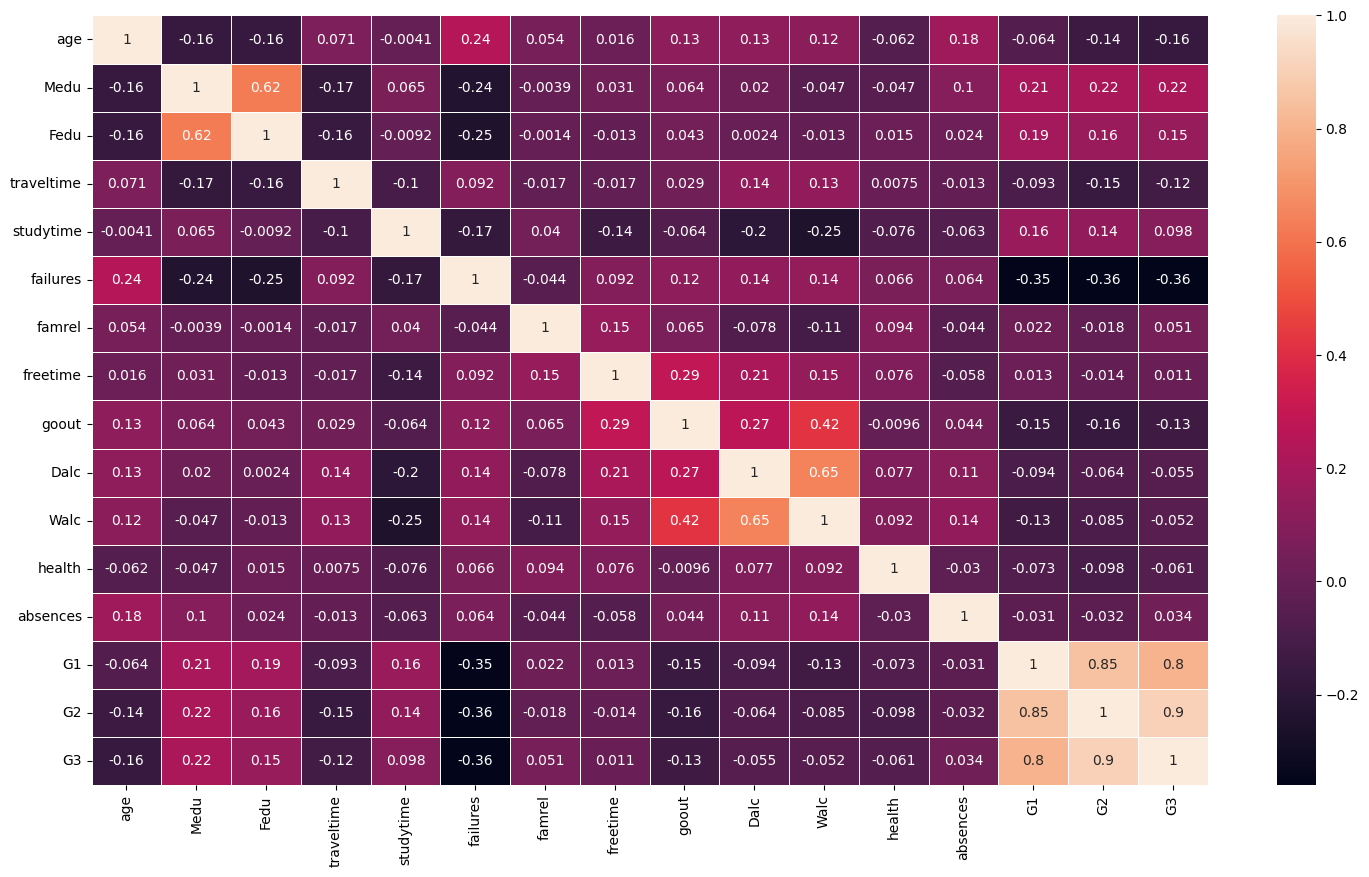

In [21]:
corr(dataNorm)

## Paso 4: Modelado

In [22]:
X = dataNorm.drop(['G3'], axis=1)
y = dataNorm['G3']

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.85, random_state=100)

ml = LinearRegression()

ml.fit(X_train, y_train)

y_pred1 = ml.predict(X_test)

round(r2_score(y_test, y_pred1),3)



0.788

In [23]:
from sklearn.metrics import mean_squared_error

rmse = mean_squared_error(y_test, y_pred1)

round(rmse, 3)

0.008

In [24]:
ml2 = LinearRegression()

ml2.fit(X_test, y_test)

y_pred2 = ml2.predict(X_test)

round(r2_score(y_test, y_pred2),3)

0.847

In [25]:
rmse2 = mean_squared_error(y_test, y_pred2)

round(rmse2, 3)

0.006

<AxesSubplot: xlabel='G3', ylabel='Density'>

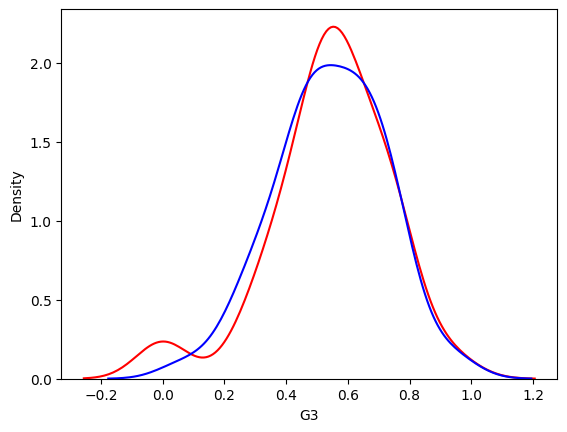

In [26]:
ax1 = sns.distplot(y_test, hist=False, color='r', label='Valores actuales')
sns.distplot(y_pred2, hist=False, color='b', label='Valores predecidos')